# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys
!pip install matplotlib numpy pandas scipy scikit-learn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:


url = "https://github.com/EpistasisLab/pmlb/raw/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"
df = pd.read_csv(url, sep='\t', compression='gzip')


print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

df.sample(10, random_state=42)

Dataset shape: (252, 15)
Missing values: 0


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
165,1.0549,35.0,217.00,73.75,40.500000,107.500000,95.099998,104.500000,64.800003,41.299999,25.600000,36.400002,33.700001,19.400000,19.200001
6,1.0549,26.0,181.00,69.75,36.400002,105.099998,90.699997,100.300003,58.400002,38.299999,22.900000,31.900000,27.799999,17.700001,19.200001
111,1.0355,43.0,183.25,70.00,37.099998,108.000000,105.000000,103.000000,63.700001,40.000000,23.600000,33.500000,27.799999,17.400000,28.000000
172,1.0521,35.0,177.25,71.00,38.400002,100.500000,90.300003,98.699997,57.799999,37.299999,22.400000,31.000000,28.700001,17.700001,20.500000
115,1.0607,40.0,158.00,69.25,36.299999,97.000000,86.599998,92.599998,55.900002,36.299999,22.100000,29.799999,26.299999,17.299999,16.700001
183,1.0713,40.0,159.25,69.75,35.299999,92.300003,86.800003,96.099998,58.000000,39.400002,22.700001,30.000000,26.400000,17.400000,12.100000
199,1.0462,43.0,170.75,67.50,37.400002,103.699997,89.699997,94.199997,58.500000,39.000000,24.100000,33.799999,28.799999,18.799999,23.600000
235,1.0563,62.0,168.75,67.50,38.299999,104.699997,95.599998,93.699997,54.400002,37.099998,22.700001,30.299999,26.299999,18.299999,18.600000
9,1.0722,23.0,198.25,73.50,42.099998,99.599998,88.599998,104.099998,63.099998,41.700001,25.000000,35.599998,30.000000,19.200001,11.700000
30,1.0716,32.0,182.00,73.75,38.700001,100.500000,88.699997,99.800003,57.500000,38.700001,33.900002,32.500000,27.700001,18.400000,11.900000


YOUR ANSWERS HERE

I chose the Body Fat dataset from PMLB. The dataset contains 252 rows and 15 columns with no missing values. The data includes various body measurements that can be used to predict body density/fat percentage.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:

print("Columns in the dataset:")
print(df.columns.tolist())
print("\n")
print(df.describe())


Columns in the dataset:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']


          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992064  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300003   
25%      1.041400   35.750000  159.000000   68.250000   36.400002   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.649998   
75%      1.070400   54.000000  197.000000   72.250000   39.425001  105.375002   
max      1.108900   81.000000  363.149994   77.750000   51.200001  136.199997   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  252.000000  252.

YOUR ANSWERS HERE

The Body Fat dataset contains 15 numeric columns representing physical measurements of 252 individuals. Density represents body density in g/cm³, which is the basis for calculating body fat percentage. Age captures the individual's age in years, ranging from 22 to 81. Weight and Height are measured in pounds and inches respectively. The remaining columns are body circumference measurements in centimeters: Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, and Wrist. These measurements capture body size at various points and are commonly used in body composition analysis. The target column is the variable we aim to predict, which represents body fat percentage. Looking at the descriptive statistics, we can see the mean age is about 45 years, mean weight is approximately 179 pounds, and the target body fat percentage ranges from about 12% to 48% with a mean around 19%.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

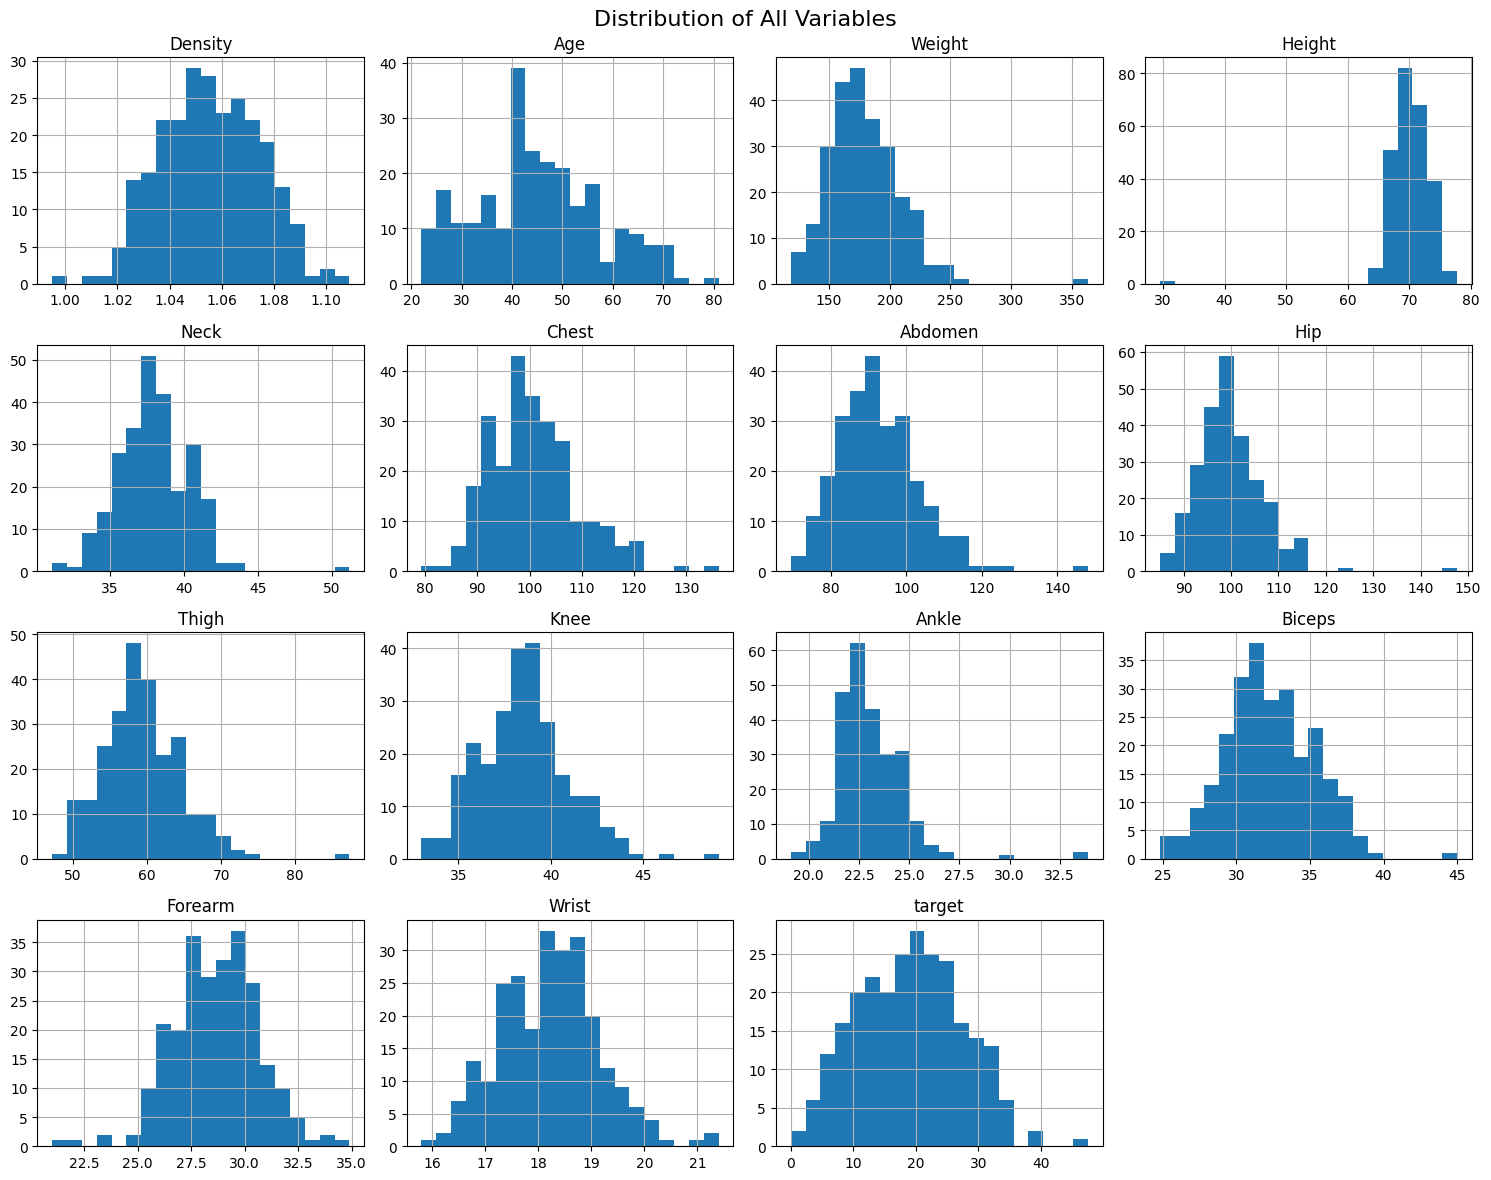

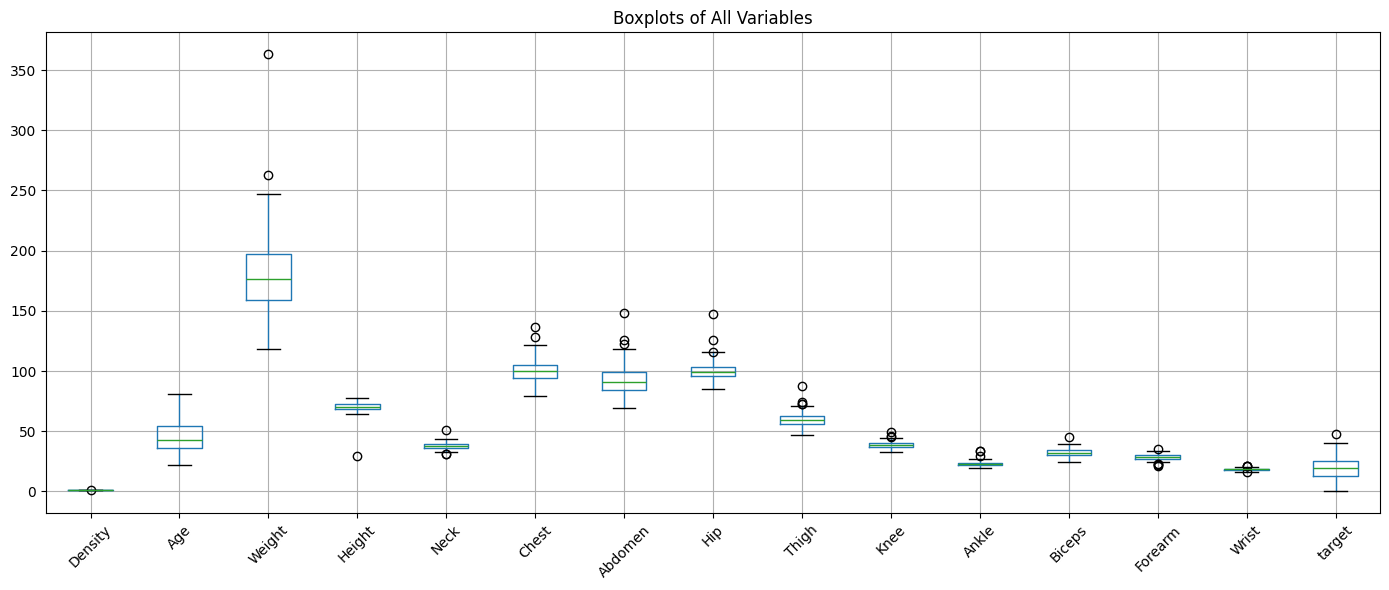

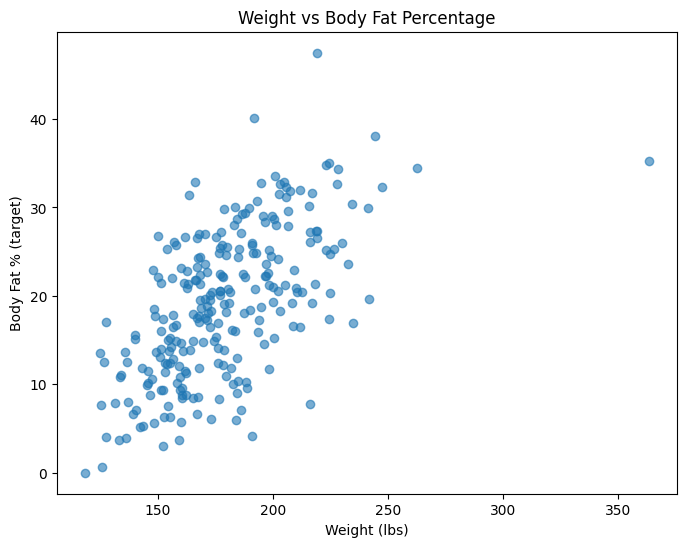

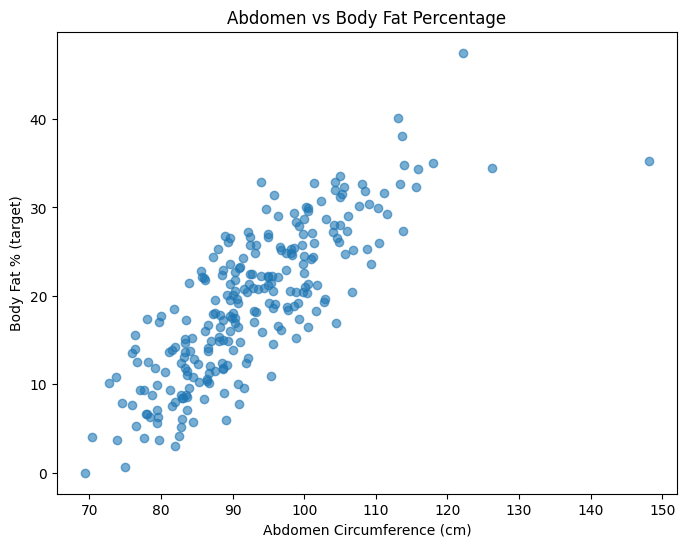

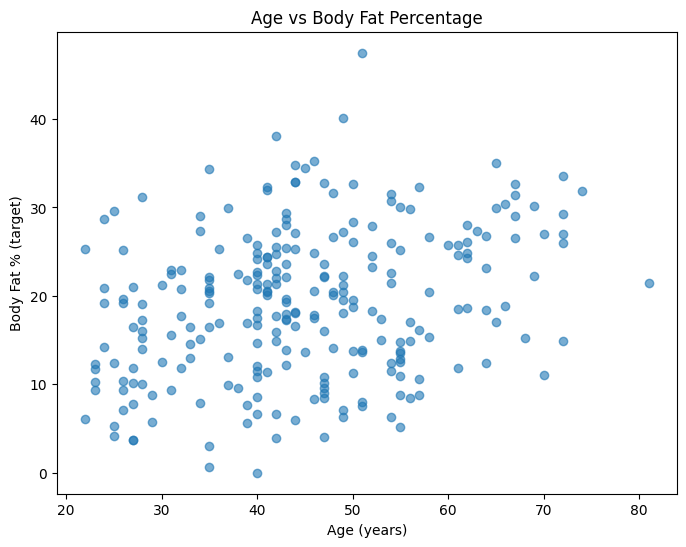

In [6]:



df.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribution of All Variables', fontsize=16)
plt.tight_layout()
plt.show()

df.boxplot(figsize=(14, 6))
plt.xticks(rotation=45)
plt.title('Boxplots of All Variables')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['target'], alpha=0.6)
plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat % (target)')
plt.title('Weight vs Body Fat Percentage')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df['Abdomen'], df['target'], alpha=0.6)
plt.xlabel('Abdomen Circumference (cm)')
plt.ylabel('Body Fat % (target)')
plt.title('Abdomen vs Body Fat Percentage')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['target'], alpha=0.6)
plt.xlabel('Age (years)')
plt.ylabel('Body Fat % (target)')
plt.title('Age vs Body Fat Percentage')
plt.show()

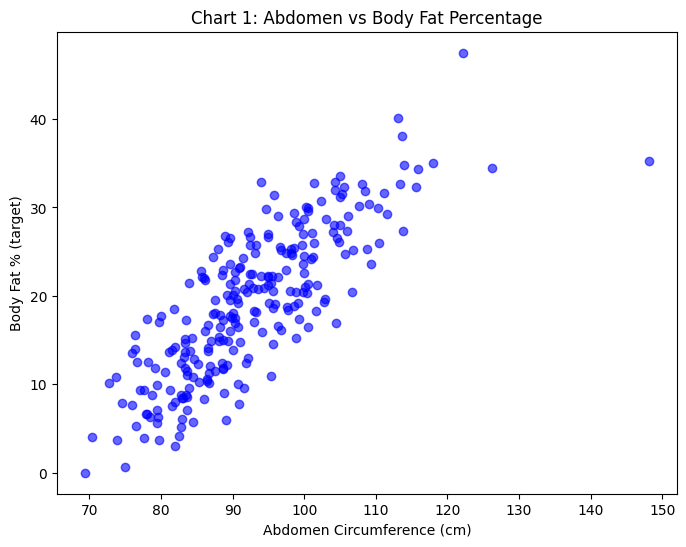

In [7]:
# Chart 1: Abdomen vs Body Fat Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['Abdomen'], df['target'], alpha=0.6, color='blue')
plt.xlabel('Abdomen Circumference (cm)')
plt.ylabel('Body Fat % (target)')
plt.title('Chart 1: Abdomen vs Body Fat Percentage')
plt.show()

Chart 1 shows the linear regression analysis with the most prominent linear relationship in our dataset. With an increase in abdomen circumference, an accompanying increase in body fat percentage can be observed. This is a very logical relationship since an increase in fat in the abdominal region is a major manifestation of increased levels of fat in a human body.

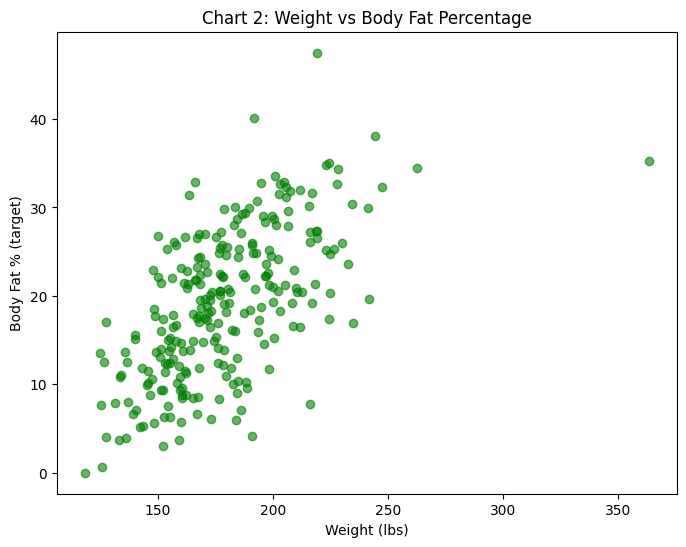

In [8]:
# Chart 2: Weight vs Body Fat Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['target'], alpha=0.6, color='green')
plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat % (target)')
plt.title('Chart 2: Weight vs Body Fat Percentage')
plt.show()

In this graph, a moderate positive correlation can be seen between weight and percent body fat. Although heavier people have a higher percent body fat, this correlation is not as strong as in the case of abdominal circumference. This is because if a person has a higher muscle mass, he or she will have a higher weight, but no less percent body fat than someone with a high percent body fat.

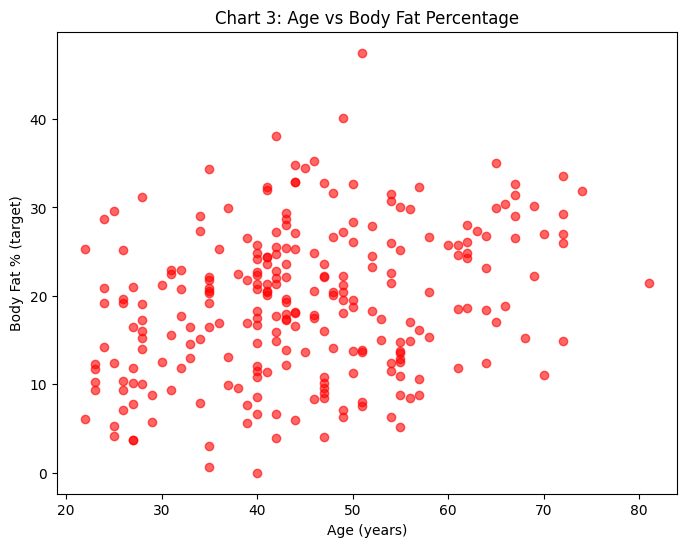

In [9]:
# Chart 3: Age vs Body Fat Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['target'], alpha=0.6, color='red')
plt.xlabel('Age (years)')
plt.ylabel('Body Fat % (target)')
plt.title('Chart 3: Age vs Body Fat Percentage')
plt.show()

This graph depicts a weak positive correlation between age and body fat percentage. Although the graph depicts a trend wherein higher body fat is associated with increasing age, large variations exist at each stage. Young people can have high body fat, and old people can have low body fat. Hence, this variable may not be a good predictor on its own but can be a good predictor when used in combination with other variables.

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

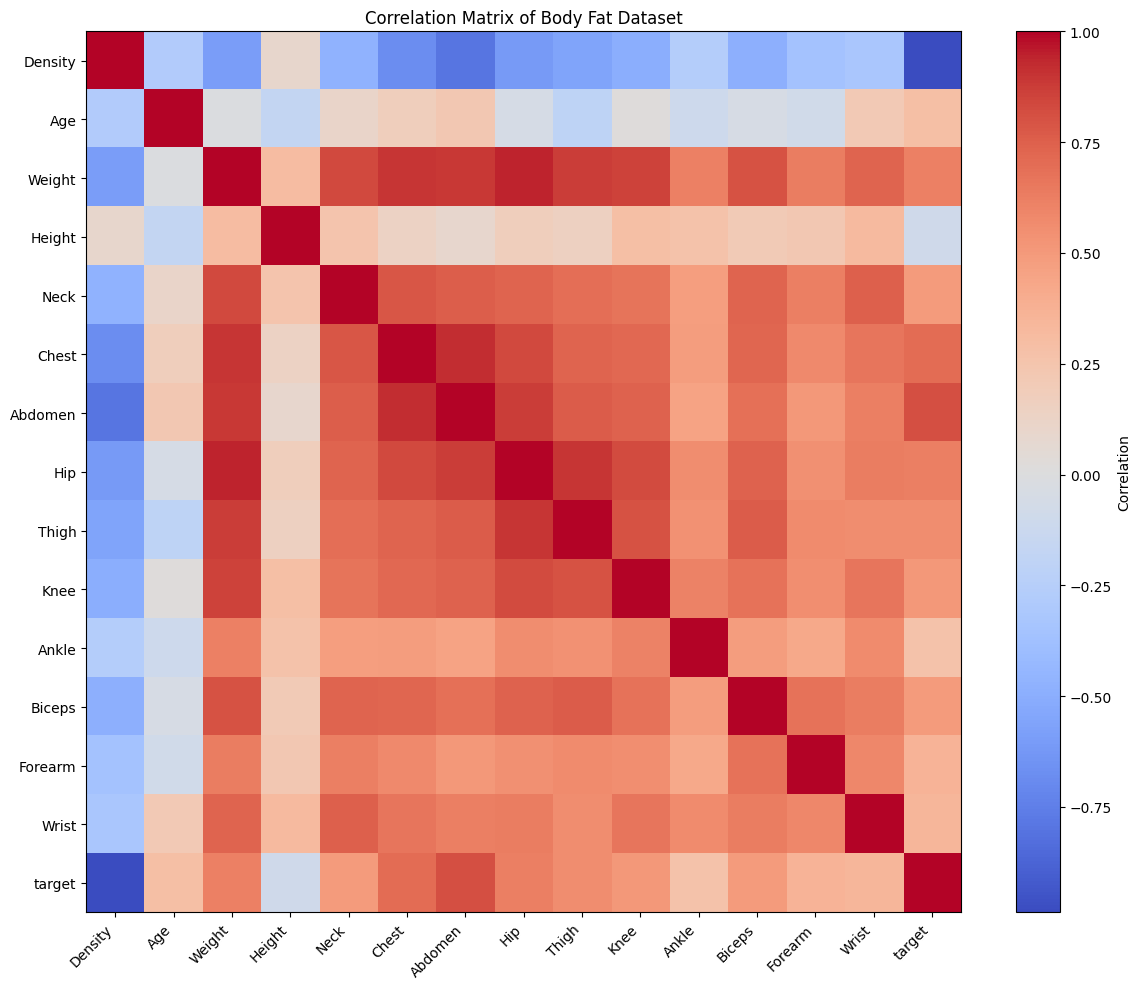

          Density       Age    Weight    Height      Neck     Chest   Abdomen  \
Density  1.000000 -0.277637 -0.594062  0.097881 -0.472967 -0.682599 -0.798955   
Age     -0.277637  1.000000 -0.012746 -0.171645  0.113505  0.176450  0.230409   
Weight  -0.594062 -0.012746  1.000000  0.308279  0.830716  0.894190  0.887995   
Height   0.097881 -0.171645  0.308279  1.000000  0.253710  0.134892  0.087813   
Neck    -0.472967  0.113505  0.830716  0.253710  1.000000  0.784835  0.754077   
Chest   -0.682599  0.176450  0.894190  0.134892  0.784835  1.000000  0.915828   
Abdomen -0.798955  0.230409  0.887995  0.087813  0.754077  0.915828  1.000000   
Hip     -0.609332 -0.050332  0.940884  0.170394  0.734958  0.829420  0.874066   
Thigh   -0.553091 -0.200096  0.868694  0.148436  0.695697  0.729859  0.766624   
Knee    -0.495041  0.017516  0.853167  0.286053  0.672405  0.719496  0.737179   
Ankle   -0.264890 -0.105058  0.613685  0.264744  0.477892  0.482988  0.453223   
Biceps  -0.487109 -0.041162 

In [10]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Body Fat Dataset')
plt.tight_layout()
plt.show()


print(correlation_matrix)

In [11]:

import numpy as np


corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))
corr_masked = corr.mask(mask)


max_corr = corr_masked.abs().max().max()
print(f"Highest correlation value: {max_corr}")


for col in corr_masked.columns:
    for idx in corr_masked.index:
        if abs(corr_masked.loc[idx, col]) == max_corr:
            print(f"Most correlated pair: {idx} and {col} with correlation {corr.loc[idx, col]:.4f}")

Highest correlation value: 0.9877824010025148
Most correlated pair: target and Density with correlation -0.9878


In [12]:
# Find most correlated pair of independent measurements (excluding target and Density)
corr = df.corr()

# Remove target and Density to find correlations between body measurements only
body_measurements = df.drop(columns=['target', 'Density'])
corr_body = body_measurements.corr()

# Mask the diagonal and upper triangle
mask = np.triu(np.ones_like(corr_body, dtype=bool))
corr_masked = corr_body.mask(mask)

# Find the maximum correlation
max_corr = corr_masked.abs().max().max()
print(f"Highest correlation among body measurements: {max_corr}")

# Find which pair
for col in corr_masked.columns:
    for idx in corr_masked.index:
        if abs(corr_masked.loc[idx, col]) == max_corr:
            print(f"Most correlated pair: {idx} and {col} with correlation {corr_body.loc[idx, col]:.4f}")

Highest correlation among body measurements: 0.9408841225678031
Most correlated pair: Hip and Weight with correlation 0.9409


The most correlated pair of columns is target (body fat %) and Density with a correlation of -0.9878. This extremely strong negative correlation exists because body density is the primary measurement used to calculate body fat percentage. However, since these variables are mathematically related, the most correlated pair of independent body measurements is Hip and Weight with a correlation of 0.9409. This makes intuitive sense as individuals with higher body weight tend to have larger hip circumferences.


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

YOUR ANSWERS HERE



Linear Regression

Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
Wikipedia: https://en.wikipedia.org/wiki/Linear_regression


Ridge Regression

Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
Wikipedia: https://en.wikipedia.org/wiki/Ridge_regression


Lasso Regression

Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
Wikipedia: https://en.wikipedia.org/wiki/Lasso_(statistics)

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

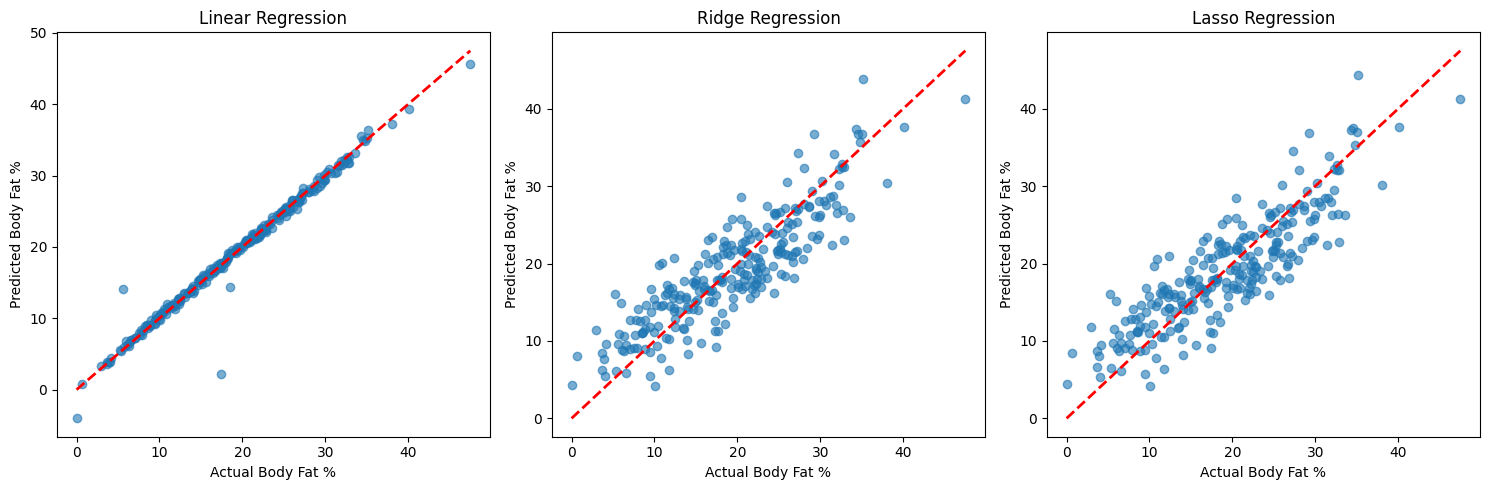

Model Performance Comparison:
--------------------------------------------------
Linear Regression:
  L2 Loss (MSE): 1.5272
  L1 Loss (MAE): 0.4802

Ridge Regression:
  L2 Loss (MSE): 16.7706
  L1 Loss (MAE): 3.3670

Lasso Regression:
  L2 Loss (MSE): 17.5791
  L1 Loss (MAE): 3.4388



In [13]:
# Problem 6: Build three regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the data
X = df.drop(columns=['target'])
y = df['target']

# Build three models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Train each model and get predictions
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    predictions[name] = model.predict(X)

# Plot actual vs predicted for all three models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, preds) in zip(axes, predictions.items()):
    ax.scatter(y, preds, alpha=0.6)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
    ax.set_xlabel('Actual Body Fat %')
    ax.set_ylabel('Predicted Body Fat %')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Compute L2 (MSE) and L1 (MAE) losses for each model
print("Model Performance Comparison:")
print("-" * 50)
for name, preds in predictions.items():
    l2_loss = mean_squared_error(y, preds)
    l1_loss = mean_absolute_error(y, preds)
    print(f"{name}:")
    print(f"  L2 Loss (MSE): {l2_loss:.4f}")
    print(f"  L1 Loss (MAE): {l1_loss:.4f}")
    print()

YOUR ANSWERS HERE

The performance levels for these regression models are divergent. Linear Regression performed better with an L2 Loss of 1.5272 and an L1 Loss of 0.4802. The scatter plots illustrate predictions lying very close to the diagonal line, which depicts good predictions. The performance of Ridge Regression was poor with an L2 Loss of 16.7706 and an L1 Loss of 3.3670. Lasso Regression performed equally badly with an L2 Loss of 17.5791 and an L1 Loss of 3.4388.
The large gap in performance between Linear Regression and the other two methods with regularization suggests that the regularization term is too high with their current alpha parameters, which leads to underfitting. Linear regression without regularization is better at learning relationships in the data when using all available samples. Although this can suggest overfitting, which will be evaluated in problem 7 using cross-validation.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [14]:


from sklearn.model_selection import cross_val_score

# Prepare the data
X = df.drop(columns=['target'])
y = df['target']

# Same three models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Perform 5-fold cross-validation for each model
print("5-Fold Cross-Validation Results:")
print("-" * 50)

cv_results = {}
for name, model in models.items():
    # neg_mean_squared_error because sklearn uses negative for scoring (higher is better)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -scores.mean()  # Convert back to positive MSE
    cv_results[name] = cv_mse
    print(f"{name}:")
    print(f"  CV L2 Loss (MSE): {cv_mse:.4f}")
    print()

# Compare CV results vs training on whole dataset
print("\nComparison: Training on Whole Dataset vs Cross-Validation")
print("-" * 60)

train_results = {
    'Linear Regression': 1.5272,
    'Ridge Regression': 16.7706,
    'Lasso Regression': 17.5791
}

for name in models.keys():
    diff = cv_results[name] - train_results[name]
    print(f"{name}:")
    print(f"  Training L2 Loss: {train_results[name]:.4f}")
    print(f"  CV L2 Loss:       {cv_results[name]:.4f}")
    print(f"  Difference:       {diff:.4f}")
    print()

5-Fold Cross-Validation Results:
--------------------------------------------------
Linear Regression:
  CV L2 Loss (MSE): 1.9632

Ridge Regression:
  CV L2 Loss (MSE): 20.3139

Lasso Regression:
  CV L2 Loss (MSE): 20.7500


Comparison: Training on Whole Dataset vs Cross-Validation
------------------------------------------------------------
Linear Regression:
  Training L2 Loss: 1.5272
  CV L2 Loss:       1.9632
  Difference:       0.4360

Ridge Regression:
  Training L2 Loss: 16.7706
  CV L2 Loss:       20.3139
  Difference:       3.5433

Lasso Regression:
  Training L2 Loss: 17.5791
  CV L2 Loss:       20.7500
  Difference:       3.1709



YOUR ANSWERS HERE

The cross-validation analysis shows overfitting in all three models because the CV L2 Loss is higher than the L2 Loss for all models. The model with less overfitting is Linear Regression because it had less difference in L2 Loss, with a difference of 0.4360 from 1.5272 to 1.9632. On the other hand, Ridge Regression had a higher difference of 3.5433 from 16.7706 to 20.3139, and Lasso Regression had a difference of 3.1709 from 17.5791 to 20.7500.
An increase in error during cross-validation is expected because when we train on the entire set, our model gets to see all the points, but during cross-validation, our model tests on points it hasn't seen before. Linear Regression continues to be the most accurate model even after considering overfitting effects and possesses a substantially lower error rate than all other models, including the regularized versions. The accuracy in both Ridge and Lasso regression models is not optimized.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [15]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df.drop(columns=['target'])
y = df['target']

# Create pipelines with StandardScaler + each model
pipelines = {
    'Linear Regression (Scaled)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge Regression (Scaled)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso Regression (Scaled)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.1))
    ])
}


print("Model Performance with Standardized Data:")
print("-" * 50)

scaled_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    preds = pipeline.predict(X)
    l2_loss = mean_squared_error(y, preds)
    l1_loss = mean_absolute_error(y, preds)
    scaled_results[name] = l2_loss
    print(f"{name}:")
    print(f"  L2 Loss (MSE): {l2_loss:.4f}")
    print(f"  L1 Loss (MAE): {l1_loss:.4f}")
    print()

print("\nComparison: Unscaled vs Scaled Data")
print("-" * 60)

unscaled_results = {
    'Linear Regression': 1.5272,
    'Ridge Regression': 16.7706,
    'Lasso Regression': 17.5791
}

for unscaled_name, scaled_name in zip(unscaled_results.keys(), scaled_results.keys()):
    diff = scaled_results[scaled_name] - unscaled_results[unscaled_name]
    print(f"{unscaled_name}:")
    print(f"  Unscaled L2 Loss: {unscaled_results[unscaled_name]:.4f}")
    print(f"  Scaled L2 Loss:   {scaled_results[scaled_name]:.4f}")
    print(f"  Difference:       {diff:.4f}")
    print()

Model Performance with Standardized Data:
--------------------------------------------------
Linear Regression (Scaled):
  L2 Loss (MSE): 1.5272
  L1 Loss (MAE): 0.4802

Ridge Regression (Scaled):
  L2 Loss (MSE): 1.5305
  L1 Loss (MAE): 0.5068

Lasso Regression (Scaled):
  L2 Loss (MSE): 1.5705
  L1 Loss (MAE): 0.4775


Comparison: Unscaled vs Scaled Data
------------------------------------------------------------
Linear Regression:
  Unscaled L2 Loss: 1.5272
  Scaled L2 Loss:   1.5272
  Difference:       0.0000

Ridge Regression:
  Unscaled L2 Loss: 16.7706
  Scaled L2 Loss:   1.5305
  Difference:       -15.2401

Lasso Regression:
  Unscaled L2 Loss: 17.5791
  Scaled L2 Loss:   1.5705
  Difference:       -16.0086



YOUR ANSWERS HERE

Preprocessing the data with standardization (mean=0, std=1) dramatically improved the performance of the regularized models. Linear Regression showed no change (1.5272 → 1.5272), which is expected because Linear Regression without regularization is scale-invariant - the coefficients simply adjust to the scale of the features.
However, Ridge Regression improved dramatically from an L2 Loss of 16.7706 to 1.5305 (a reduction of 15.24), and Lasso Regression improved from 17.5791 to 1.5705 (a reduction of 16.01). This massive improvement occurs because regularization penalizes the magnitude of coefficients. When features are on different scales (e.g., Weight in pounds vs. Wrist in centimeters), features with larger scales naturally have smaller coefficients, and the regularization penalty affects features unequally. Standardizing puts all features on the same scale, allowing the regularization to work as intended.
After scaling, all three models perform nearly identically, with L2 losses around 1.53-1.57, suggesting that with properly scaled data, regularization provides minimal benefit for this dataset.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWERS HERE

Repeatedly trying 1000 random models and selecting the best one based on cross-validation results is a form of overfitting to the validation set, because you are essentially using the validation data to make model selection decisions, which inflates performance estimates and may not generalize to truly unseen data.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

YOUR ANSWERS HERE

Of all the models developed in this project, I pick linear regression with standardized inputs using a pipeline as the model that performs the best. Here is why:
Performances: Linear Regression gave the lowest L2 Loss of 1.5272 when trained on all data and 1.9632 in cross-validation. After scaling, both Ridge and Lasso produced very similar performances with 1.5305 and 1.5705 respectively, but LinearRegression stood marginally better.
Generalization: The model with the least error difference between training and cross-validation error was Linear Regression, with an error difference of 0.4360, which implies better generalization performance with less overfitting relative to both Ridge and Lasso. The error differences for Ridge and Lasso were 3.5433 and
Simplify: As a guideline described by Occam’s Razor, if two models have equally good performance, it is always better to go for the simpler model. Linear Regression does not have any hyperparameters, unlike Ridge and Lasso regression where an alpha parameter needs to be set.
Relevance: In terms of relevance to the problem of estimating body fat, interpretability is an important consideration. With Linear Regression, it is easy to interpret the coefficients because they represent exactly how each measurement can contribute to an estimate of body fat percentage.
In short, Linear Regression provides a balance of accuracy, generality, simplicity, and interpretability for this task of predicting body fat.